In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
actions = ['cold', 'dizziness', 'allergic_reaction', 'snot', 'unwell', 'hello', 'myself']
actions = np.array(actions)

In [3]:
label_map = {label:num for num, label in enumerate(actions)}

In [4]:
label_map

{'cold': 0,
 'dizziness': 1,
 'allergic_reaction': 2,
 'snot': 3,
 'unwell': 4,
 'hello': 5,
 'myself': 6}

In [5]:
print(len([name for name in os.listdir(os.path.join('keypoints', 'myself'))]))

200


In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in range(200):
        window = []
        for frame_num in range(90):
            res = np.load(os.path.join('keypoints', action, str(sequence+1), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [7]:
np.array(sequences).shape

(1400, 90, 1662)

In [8]:
np.array(labels).shape

(1400,)

In [9]:
X = np.array(sequences)

In [10]:
X.shape

(1400, 90, 1662)

In [11]:
y = to_categorical(labels).astype(int)

In [12]:
y.shape

(1400, 7)

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
X_scale = scaler.fit_transform(X.reshape(X.shape[0], -1)).reshape(X.shape)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.1)

In [16]:
X_test.shape

(140, 90, 1662)

In [17]:
y_test.shape

(140, 7)

In [18]:
X_train[0]

array([[0.36495837, 0.29019354, 0.81895418, ..., 0.        , 0.        ,
        1.        ],
       [0.36720146, 0.32394109, 0.64552467, ..., 0.        , 0.        ,
        0.67659821],
       [0.38706097, 0.32780803, 0.65675001, ..., 0.        , 0.        ,
        0.70799421],
       ...,
       [0.42953668, 0.25687016, 0.58955714, ..., 0.        , 0.        ,
        0.80509824],
       [0.42967711, 0.26029506, 0.57069494, ..., 0.        , 0.        ,
        0.78743969],
       [0.43156453, 0.28308273, 0.5330333 , ..., 0.        , 0.        ,
        0.74763913]])

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [25]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [26]:
model = Sequential()
model.add(LSTM(64, return_sequences=False, activation='relu', input_shape=(90, 1662)))
model.add(Dense(64, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) , loss='categorical_crossentropy', metrics='categorical_accuracy')

In [28]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
36/36 [==============================] - 4s 85ms/step - loss: 2.5143 - categorical_accuracy: 0.1711 - val_loss: 2.0146 - val_categorical_accuracy: 0.1667
Epoch 2/100
36/36 [==============================] - 3s 76ms/step - loss: 1.9919 - categorical_accuracy: 0.2125 - val_loss: 1.9517 - val_categorical_accuracy: 0.1984
Epoch 3/100
36/36 [==============================] - 3s 76ms/step - loss: 1.9225 - categorical_accuracy: 0.2628 - val_loss: 1.9140 - val_categorical_accuracy: 0.2222
Epoch 4/100
36/36 [==============================] - 3s 77ms/step - loss: 1.8543 - categorical_accuracy: 0.2734 - val_loss: 1.8523 - val_categorical_accuracy: 0.2460
Epoch 5/100
36/36 [==============================] - 3s 76ms/step - loss: 1.8143 - categorical_accuracy: 0.2884 - val_loss: 1.8295 - val_categorical_accuracy: 0.2619
Epoch 6/100
36/36 [==============================] - 3s 78ms/step - loss: 1.7738 - categorical_accuracy: 0.3263 - val_loss: 1.8082 - val_categorical_accuracy: 0.2381
Epoc

KeyboardInterrupt: 

In [31]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 16ms/step - loss: 0.1712 - categorical_accuracy: 0.9500


[0.17117993533611298, 0.949999988079071]

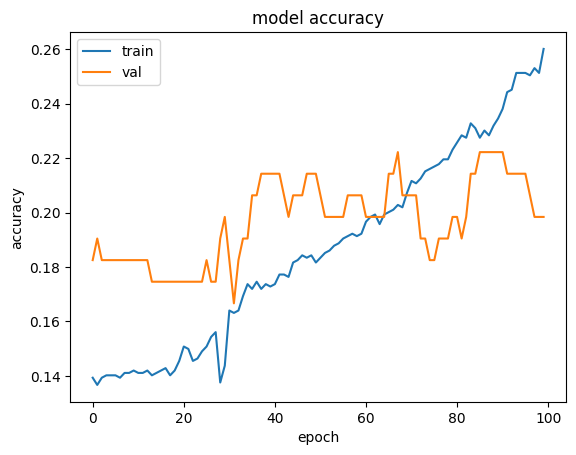

In [30]:
# accuracy 
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
model.save('models/baseline_7class_9500.h5')